# Heart Failure Predictive Analysis

Domain yang dipilih untuk dilakukan prediksi adalah domain kesehatan, yang berfokus pada penyakit kardiovaskular.

Penyakit kardiovaskular (CVD) adalah penyebab utama kematian di seluruh dunia, merenggut sekitar 17,9 juta jiwa setiap tahun dan menyumbang 31% dari semua kematian di seluruh dunia. Empat dari setiap lima kematian akibat penyakit kardiovaskular disebabkan oleh serangan jantung dan stroke, dan sepertiga dari kematian ini terjadi lebih awal pada orang di bawah usia 70 tahun. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan dataset ini berisi 11 fitur yang dapat digunakan untuk memprediksi kemungkinan penyakit jantung.

Orang dengan penyakit kardiovaskular atau risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, kondisi medis yang sudah ada sebelumnya) adalah pengguna awal yang memerlukan deteksi dan manajemen dini, di mana model _machine learning_ yang dibuat dapat sangat membantu.

Referensi:
[1] [Heart Failure: Diagnosis, Severity Estimation and Prediction of Adverse Events Through Machine Learning Techniques](https://www.sciencedirect.com/science/article/pii/S2001037016300460)

## Business Understanding

Pada bagian _Business Understanding_ akan dijelaskan mengenai permasalahan yang akan diselesaikan (_problem statements_), tujuan (_goal_), dan solusi yang diajukan (_solution statements_).

### Problem Statements
Bagaimana mengetahui pasien memiliki penyakit jantung (_heart disease_) berdasarkan riwayat dari variabel-variabel kesehatan yang ada?

### Goals
Untuk menyelesaikan permasalahan yang telah disampaikan pada bagian _Problem Statement_, maka dibuat model yang digunakan untuk memprediksi apakah seseorang memiliki penyakit jantung (_heart disease_) berdasarkan riwayat kesehatannya.

### Solution statements
Solusi pembuatan model yang dilakukan adalah dengan menerapkan 3 algoritma machine learning, terbatas pada **_K-NN_**, **_Random Forest_**, dan **_AdaBoost_**. Diterapkannya 3 algoritma tersebut bertujuan untuk mengkomparasi dan mendapatkan model atau algoritma yang memiliki tingkat _error_ yang paling kecil, sehingga prediksi penyakit jantung memiliki akurasi yang tinggi.

- **_K-NN_**
Algoritma _K-Nearest Neighbor_ (K-NN) adalah algoritma _machine learning_ yang sederhana dan mudah diterapkan, yang mana umumnya digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Algoritma ini termasuk dalam _supervised learning_. Tujuan dari algortima K-NN adalah untuk mengidentifikasi _nearest neighbor_ dari titik yang diberikan, sehingga dapat menetapkan label prediksi ke titik tersebut.

- **_Random Forest_**
_Random forest_ adalah kombinasi dari masing – masing _tree_ atau pohon, yang kemudian dikombinasikan ke dalam satu model. _Random Forest_ bergantung pada sebuah nilai vector acak dengan distribusi yang sama pada semua pohon yang masing masing _tree_ memiliki kedalaman yang maksimal.

- **_AdaBoost_**
_AdaBoost_ atau _Adaptive Boost_ merupakan algoritma yang memanfaatkan _bagging_ dan _boosting_ untuk meningkatkan akurasi. Sama seperti algoritma _random forest_, algoritma _AdaBoost_ juga menggunakan beberapa _decision tree_ untuk melakukan prediksi.

In [1]:
# libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Data Understanding
Dataset yang digunakan pada proyek _machine learning_ merupakan **918 data observasi** yang didapat dari situs [kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) dan [UCI Machine Learning Repository] (http://archive.ics.uci.edu/ml/datasets/Heart+Disease). Terdapat 11 fitur yang dapat digunakan untuk memprediksi kemungkinan penyakit jantung.

**Variabel-variabel pada Heart Failure UCI Dataset adalah sebagai berikut:**

1.  Age: usia pasien, dalam tahun (_years_)
2.  Sex: jenis kelamin pasien
	- M: Pria (_Male_),
	- F: Wanita (_Female_)
3.  ChestPainType: tipe sakit pada dada
    - TA: Typical Angina,
    - ATA: Atypical Angina,
    - NAP: Non-Anginal Pain,
    - ASY: Asymptomatic
4.  RestingBP: tekanan darah (_mm Hg_)
5.  Cholesterol: serum cholesterol (_mm/dl_)
6.  FastingBS: gula darah
    - if FastingBS > 120 mg/dl
    - 0: sebaliknya (_otherwise_)
7.  RestingECG: hasil ECG
    - Normal: Normal,
    - ST: memiliki kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV),
    - LVH: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes
8.  MaxHR: detak jantung maksimum tercapai (Nilai numerik antara 60 dan 202)
9.  ExerciseAngina: angina yang diinduksi oleh olahraga [
    - Y: Ya,
    - N: Tidak (_No_)
10.  Oldpeak: oldpeak = ST (Nilai numerik diukur dalam depresi)
11.  ST_Slope: kemiringan puncak latihan segmen ST
     - Up: upsloping,
     - Flat: flat,
     - Down: downsloping]
12.  HeartDisease: kelas keluaran
     - 1: Penyakit Jantung (_heart disease_),
     - 0: Normal

[2]: [Heart Failure UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In [2]:
# load the dataset
heart_disease = pd.read_csv('heart.csv') # load to read dataset file
heart_disease # display dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Explanatory Data Analysis

In [3]:
# getting information of dataset
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Dari informasi yang didapatkan, disimpulkan terdapat 11 fitur pada data _heart disease_, yang mana memiliki 5 fitur _categorical_ dan 7 fitur _numerical_.

_Categorical_ fitur di antaranya adalah `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, dan `ST_Slop`.

_Numerical_ fitur di antaranya adalah `Age`, `RestingBP`, `Cholesterol`, `FastingBS`, `MaxHR`, `Oldpeak`, dan `HeartDisease`.

`describe()` adalah _command_ yang digunakan untuk mengetahui deskripsi statistik dari dataset _heart disease_.

In [4]:
# getting description of heart_disease dataset
heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Univariate Analysis

In [5]:
heart_disease.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Perlu membagi dataset menjadi 2 fitur, yakni categorical dan numerical

In [6]:
# assign numerical and categorical
categorical_feature = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
numerical_feature = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

print('fitur categorical: ', categorical_feature)
print('fitur numerical: ', numerical_feature)

fitur categorical:  ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
fitur numerical:  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


#### Analisis terhadap fitur categorical

Perlu diketahui bahwa variabel `target` dari _predictive analysis_ yang dilakukan adalah `HeartDisease`.

Dari _plot_ yang dibuat, dapat diketahui bahwa data lebih banyak menunjukkan kondisi _heart disease_ [1] dibanding kondisi normal [0].

(-1.25, 1.25, -1.25, 1.25)

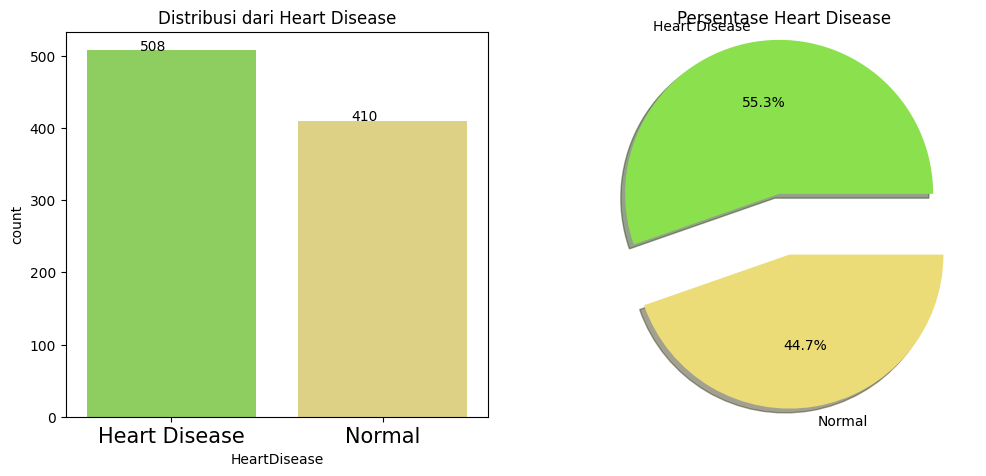

In [7]:
hd_label = ['Heart Disease', 'Normal']
hd_color = ["#8be04e", "#ebdc78"]

# checking plot of hd
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
hd_plot = sns.countplot(x = heart_disease.HeartDisease, order = heart_disease.HeartDisease.value_counts().index, palette = hd_color)
hd_plot.set_title('Distribusi dari Heart Disease')
hd_plot.set_xticklabels(hd_label, fontsize = 15)
for p in hd_plot.patches:
   hd_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1, 2, 2)
hd_pie = heart_disease['HeartDisease'].value_counts()
hd_pie = hd_pie.plot.pie(explode = [0.2, 0.2], labels = hd_label, autopct = '%1.1f%%', shadow = True, colors = hd_color)
hd_pie.set_title(label = 'Persentase Heart Disease')
plt.axis('off')

Dari _plot_ yang dibuat, dapat diketahui bahwa distribusi jenis kelamin yang lebih banyak menunjukkan kondisi _heart disease_ adalah Pria, dibandingkan Wanita. Hal ini disebabkan karena data Pria lebih banyak dibanding Wanita.

Dari _pie plot_ yang dibuat, ditunjukkan bahwa Wanita memiliki penyakit jantung 3x lebih rendah dibandingkan Pria.

(-1.25, 1.25, -1.25, 1.25)

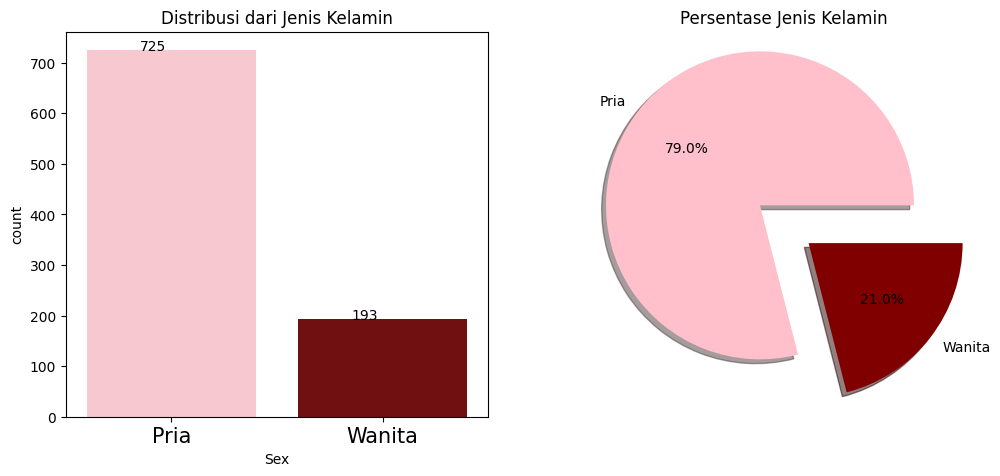

In [8]:
sex_label = ['Pria', 'Wanita']
sex_color = ['pink', 'maroon']

# checking plot of sex
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sex_plot = sns.countplot(x = heart_disease.Sex, palette = sex_color)
sex_plot.set_title('Distribusi dari Jenis Kelamin')
sex_plot.set_xticklabels(sex_label, fontsize = 15)
for p in sex_plot.patches:
   sex_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1, 2, 2)
sex_pie = heart_disease['Sex'].value_counts()
sex_pie = sex_pie.plot.pie(explode = [0.2, 0.2], labels = sex_label, autopct = '%1.1f%%', shadow = True, colors = sex_color)
sex_pie.set_title(label = 'Persentase Jenis Kelamin')
plt.axis('off')

Dapat dilihat dari _bar plot_ dan _pie plot_ bahwa tipe sakit dada atau `ChestPainType` yang banyak ditemukan atau memiliki keluhan diderita paling tinggi adalah `ASY` atau _Asymptomatic_ sebesar 54%.

(-1.25, 1.25, -1.25, 1.25)

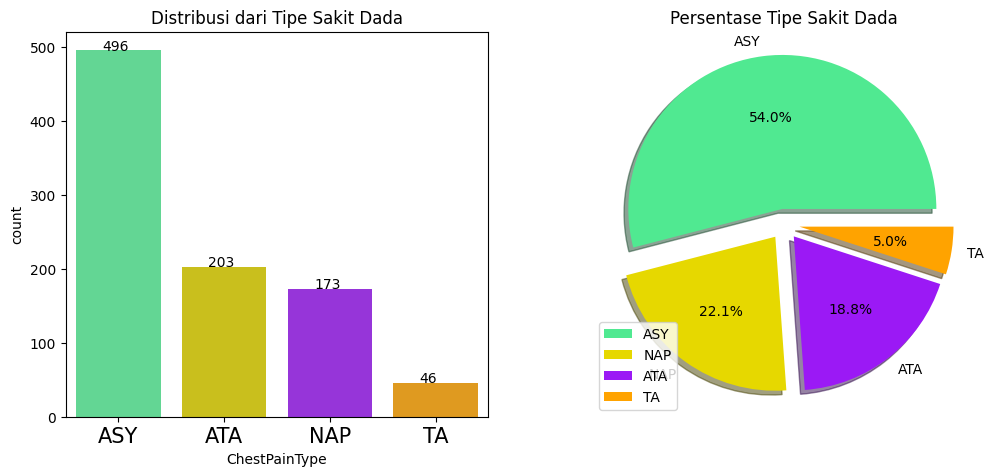

In [9]:
chestpain_label = ['ASY', 'ATA', 'NAP', 'TA']
chestpain_colors = ["#50e991", "#e6d800", "#9b19f5", "#ffa300"]

# checking plot of sex
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
chestpain_plot = sns.countplot(x = heart_disease.ChestPainType, order = heart_disease.ChestPainType.value_counts().index, palette = chestpain_colors)
chestpain_plot.set_title('Distribusi dari Tipe Sakit Dada')
chestpain_plot.set_xticklabels(chestpain_label, fontsize = 15)
for p in chestpain_plot.patches:
   chestpain_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1, 2, 2)
chestpain_pie = heart_disease['ChestPainType'].value_counts()
chestpain_pie = chestpain_pie.plot.pie(explode = [0.1, 0.1, 0.1, 0.1], colors = chestpain_colors, autopct = '%1.1f%%', shadow = True)
chestpain_pie.set_title(label = 'Persentase Tipe Sakit Dada')
plt.legend()
plt.axis('off')

Pada variabel `RestingECG` terdapat 3 level tekanan darah, yakni Normal, LVH, dan ST. Dari dua _plot_ yang menyajikan ketiga level tersebut, dapat diketahui bahwa kategori Normal memiliki mayoritas distribusi, yakni sebesar 63.8%.

(-1.25, 1.25, -1.25, 1.25)

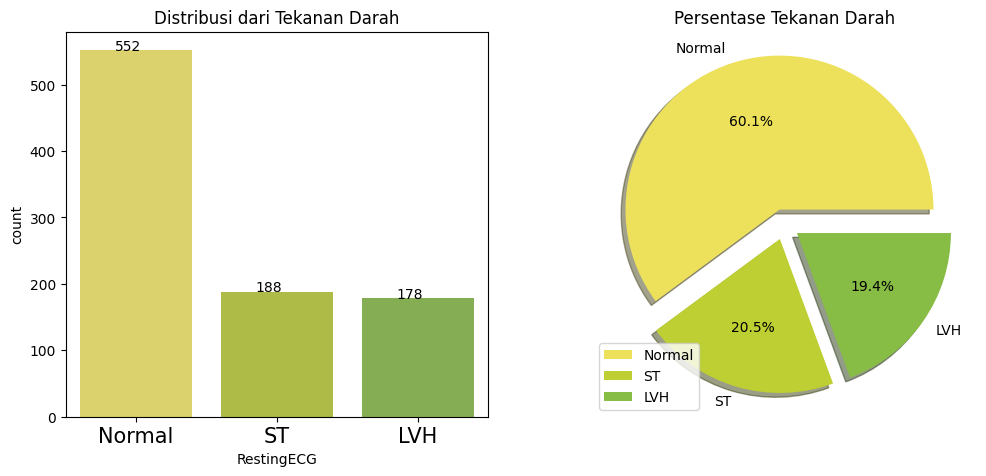

In [10]:
ecg_label = ['Normal', 'ST', 'LVH']
ecg_colors = ["#ede15b", "#bdcf32", "#87bc45"]

# checking plot of resting ecg
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
ecg_plot = sns.countplot(x = heart_disease.RestingECG, order = heart_disease.RestingECG.value_counts().index, palette = ecg_colors)
ecg_plot.set_title('Distribusi dari Tekanan Darah')
ecg_plot.set_xticklabels(ecg_label, fontsize = 15)
for p in ecg_plot.patches:
   ecg_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1, 2, 2)
ecg_pie = heart_disease['RestingECG'].value_counts()
ecg_pie = ecg_pie.plot.pie(explode = [0.1, 0.1, 0.1], labels = ecg_label, colors = ecg_colors, autopct = '%1.1f%%', shadow = True)
ecg_pie.set_title(label = 'Persentase Tekanan Darah')
plt.legend()
plt.axis('off')

Pada variabel `ExerciseAngina` yang disajikan oleh dua _plot_, dapat diketahui bahwa lebih banyak yang melakukan latihan angina, yakni sebesar 65.0%

(-1.25, 1.25, -1.25, 1.25)

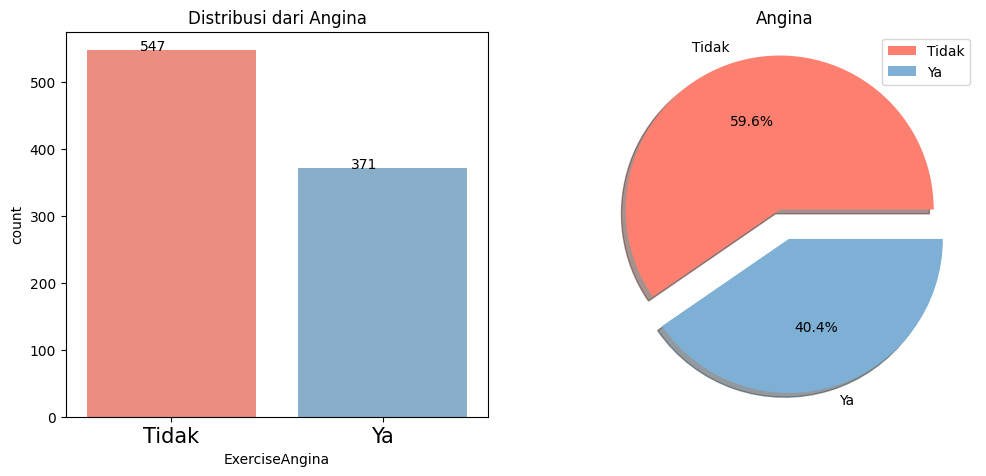

In [11]:
angina_label = ['Tidak', 'Ya']
angina_color = ["#fd7f6f", "#7eb0d5"]

# checking plot of exercise angina
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
angina_plot = sns.countplot(x = heart_disease.ExerciseAngina, order = heart_disease.ExerciseAngina.value_counts().index, palette = angina_color)
angina_plot.set_title('Distribusi dari Angina')
angina_plot.set_xticklabels(angina_label, fontsize = 15)
for p in angina_plot.patches:
   angina_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1, 2, 2)
angina_pie = heart_disease['ExerciseAngina'].value_counts()
angina_pie = angina_pie.plot.pie(explode = [0.1, 0.1], labels = angina_label, colors = angina_color, autopct = '%1.1f%%', shadow = True)
angina_pie.set_title(label = 'Angina')
plt.legend()
plt.axis('off')

Pada variabel `ST_Slope` yang disajikan oleh dua _plot_, dapat diketahui bahwa `Flat` lebih banyak yang memiliki kemiringan pada puncak segmen ST, yakni sebesar 51.6%

(-1.25, 1.25, -1.25, 1.25)

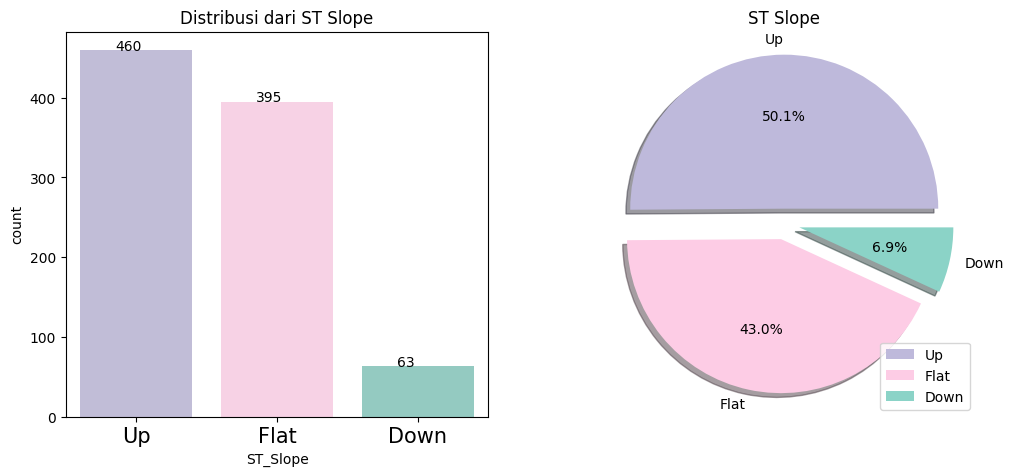

In [12]:
slope_label = ['Up', 'Flat', 'Down']
slope_color = ["#beb9db", "#fdcce5", "#8bd3c7"]

# checking plot of ST Slope
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
slope_plot = sns.countplot(x = heart_disease.ST_Slope, order = heart_disease.ST_Slope.value_counts().index, palette = slope_color)
slope_plot.set_title('Distribusi dari ST Slope')
slope_plot.set_xticklabels(slope_label, fontsize = 15)
for p in slope_plot.patches:
   slope_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1, 2, 2)
slope_pie = heart_disease['ST_Slope'].value_counts()
slope_pie = slope_pie.plot.pie(explode = [0.1, 0.1, 0.1], labels = slope_label, colors = slope_color, autopct = '%1.1f%%', shadow = True)
slope_pie.set_title(label = 'ST Slope')
plt.legend()
plt.axis('off')

#### Analisis terhadap fitur numerical

melihat histogram masing-masing fitur _numerical_ yaitu `Age`, `RestingBP`, `Cholesterol`, `MaxHR`, dan `Oldpeak`

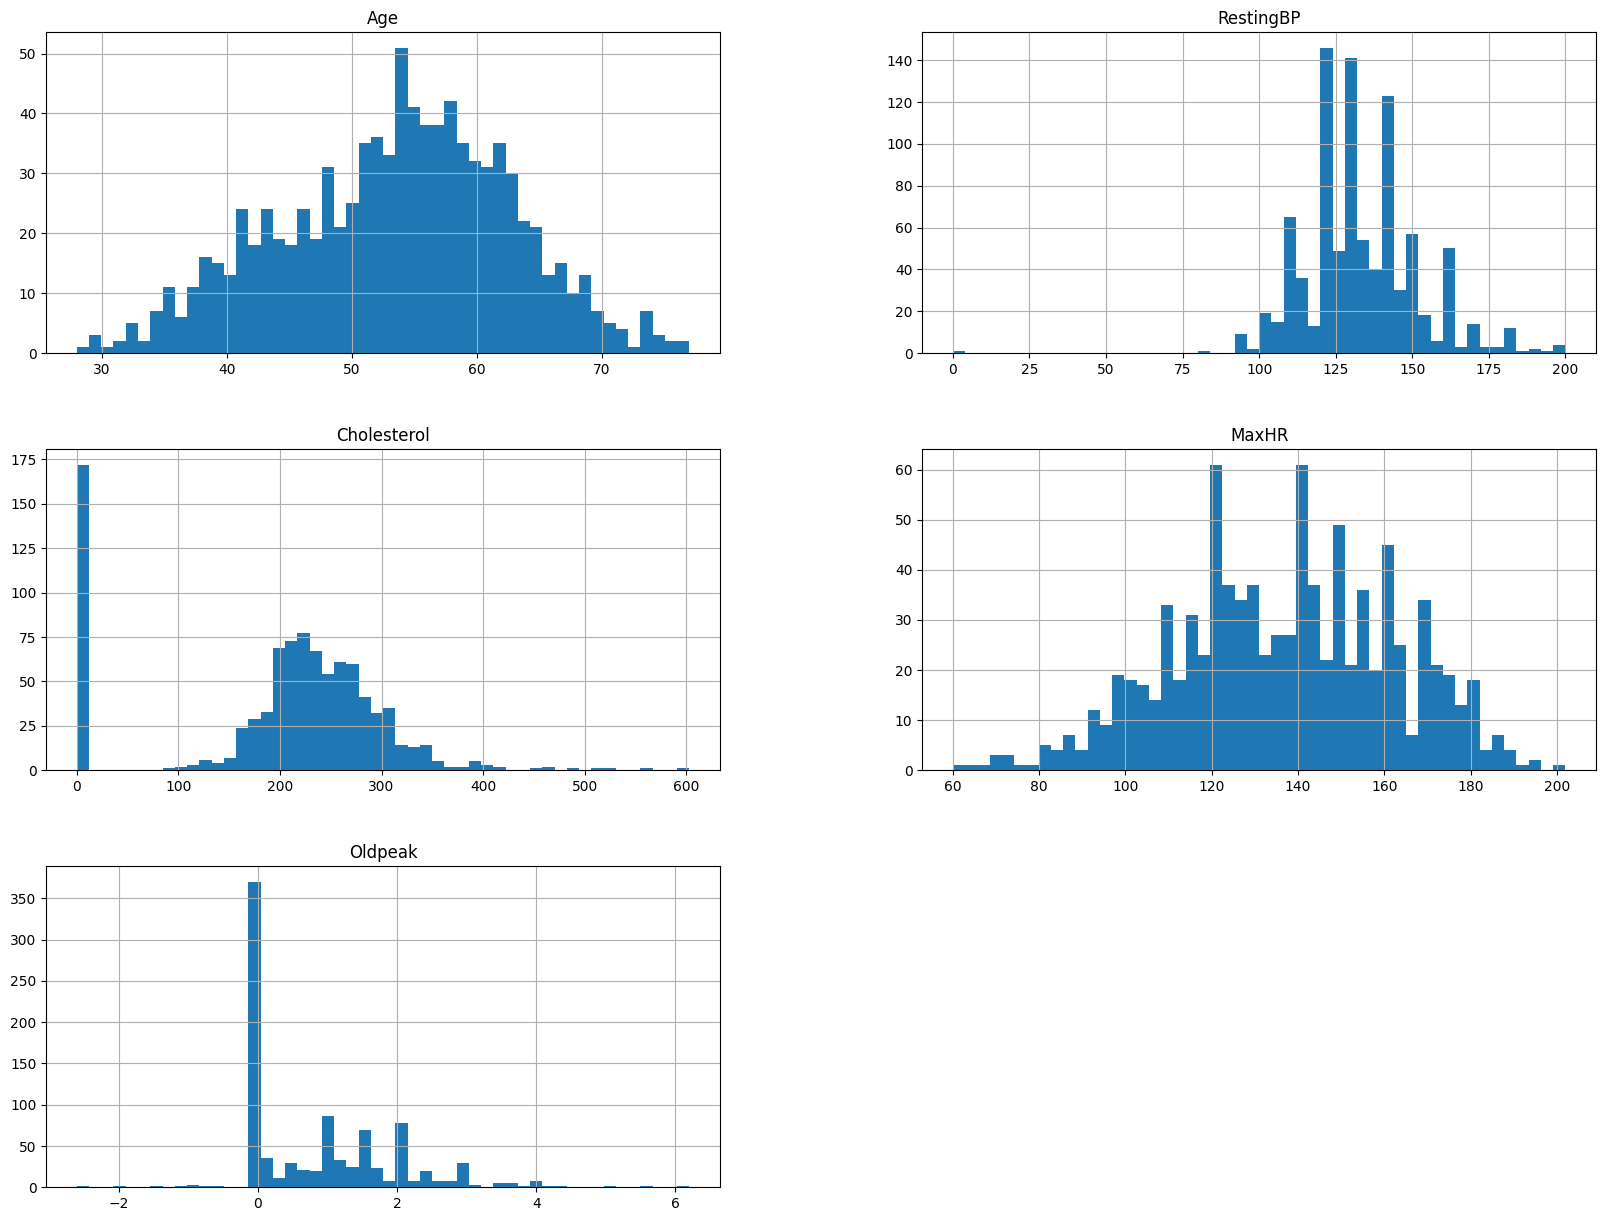

In [13]:
heart_disease[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis

#### Analisis terhadap categocial

Mengecek rerata `heart disease` terhadap masing-masing fitur untuk mengetahui pengaruh fitur terhadap `heart disease`

<Figure size 1200x700 with 0 Axes>

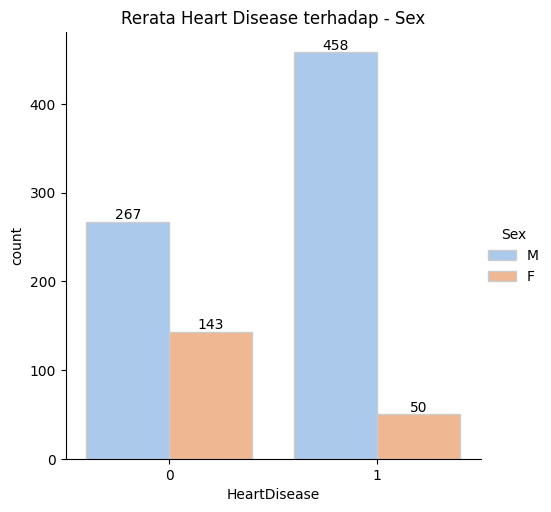

<Figure size 1200x700 with 0 Axes>

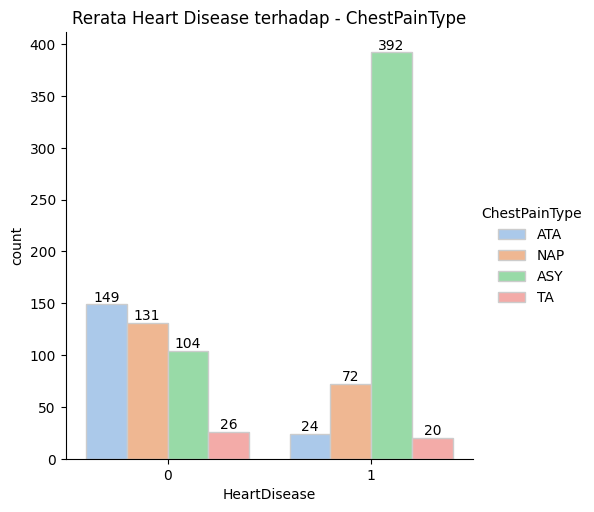

<Figure size 1200x700 with 0 Axes>

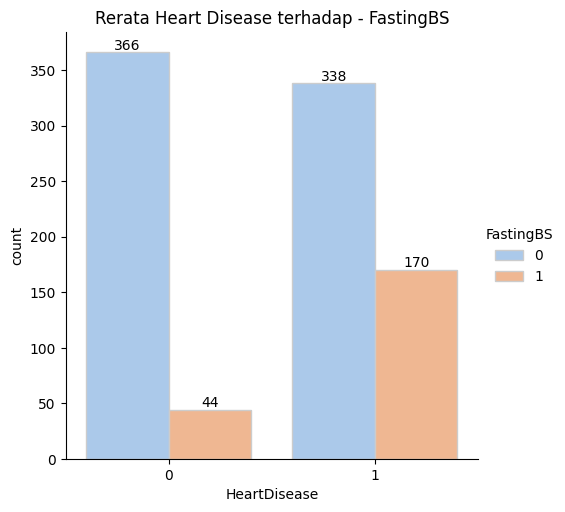

<Figure size 1200x700 with 0 Axes>

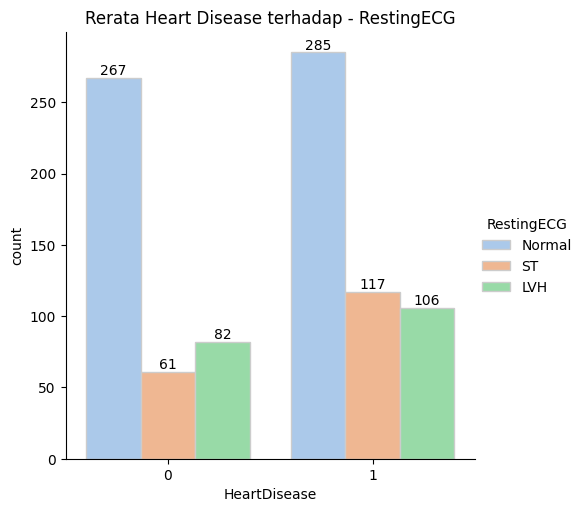

<Figure size 1200x700 with 0 Axes>

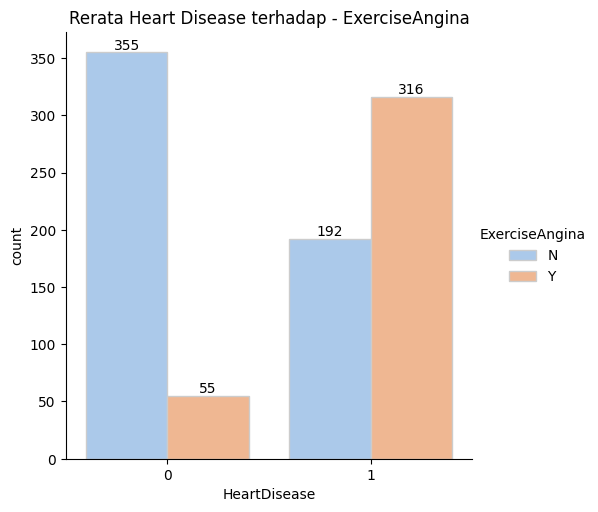

<Figure size 1200x700 with 0 Axes>

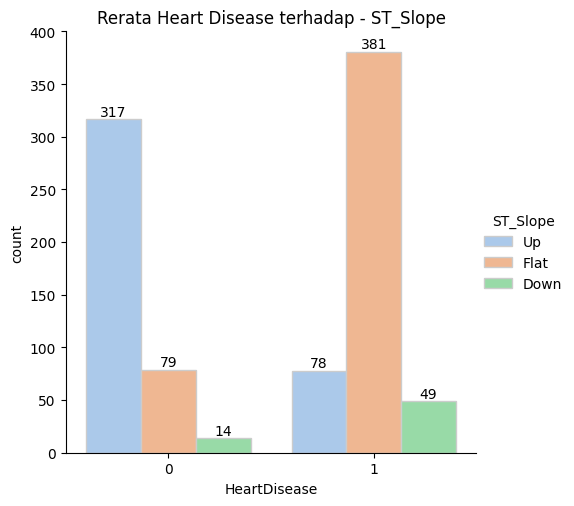

In [14]:
for i in range(len(categorical_feature)-1):
    plt.figure(figsize = (12, 7))
    catp = sns.catplot(x = 'HeartDisease', data = heart_disease, hue = categorical_feature[i], kind = 'count', palette = 'pastel', edgecolor = '.8')
    ax = catp.facet_axis(0, 0)

    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')


    plt.title('Rerata Heart Disease terhadap - {}'.format(categorical_feature[i]))
    plt.show()

In [15]:
categorical_feature

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

Dengan mengamati rata-rata harga relatif terhadap fitur _categorical_ di atas, didapatkan _insight_ sebagai berikut:

Heart Disease [0] menunjukkan bahwa pasien Normal
Heart Disease [1] menunjukkan bahwa pasien memiliki penyakit jantung
- Pada fitur `sex`, rerata penyakit jantung atau _heart disease_ menyerang seseorang berjenis kelamin pria, dibanding wanita. Hal ini dapat dilihat pada bar chart [1] yang melambangkan pasien memiliki penyakit jantung. Pada pasien normal (tidak memiliki penyakit jantung, dilambangkan dengan [0]), rerata didominasi dengan pria. Hal yang sama juga terjadi pada pasien dengan penyakit jantung (dilambangkan dengan [1]), yang rerata didominasi dengan pria.
- Pada fitur `ChestPainType`, rerata pasien yang memiliki penyakit jantung (dilambangkan dengan [1]) memiliki sakit dada dengan tipe _Asymptomatic_ [ASY] sebannyak 392 kasus.
- Pada fitur `FastingBS`, rerata pasien yang memiliki penyakit jantung (dilambangkan dengan [1]) memiliki gula darah di bawah 120 mg/dl. Sedangkan pasien yang memiliki gula darah > 120 mg/dl cenderung tidak memiliki penyakit jantung.
- Pada fitur `RestingECG`, rerata pasien yang memiliki penyakit jantung (dilambangkan dengan [1]) memiliki tekanan darah yang normal.
- Pada fitur `ExerciseAngina`, rerata pasien yang memiliki penyakit jantung (dilambangkan dengan [1]) memiliki angin.
- Pada fitur `ST_Slope`, rerata pasien yang memiliki penyakit jantung (dilambangkan dengan [1]) memiliki segmen ST yang bertipe flat.

#### Analisis terhadap fitur numerical

Melakukan observasi korelasi antara fitur numerical dengan fitur target menggunakan fungsu `corr()`

In [16]:
heart_disease.select_dtypes(['int64', 'float64'])

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


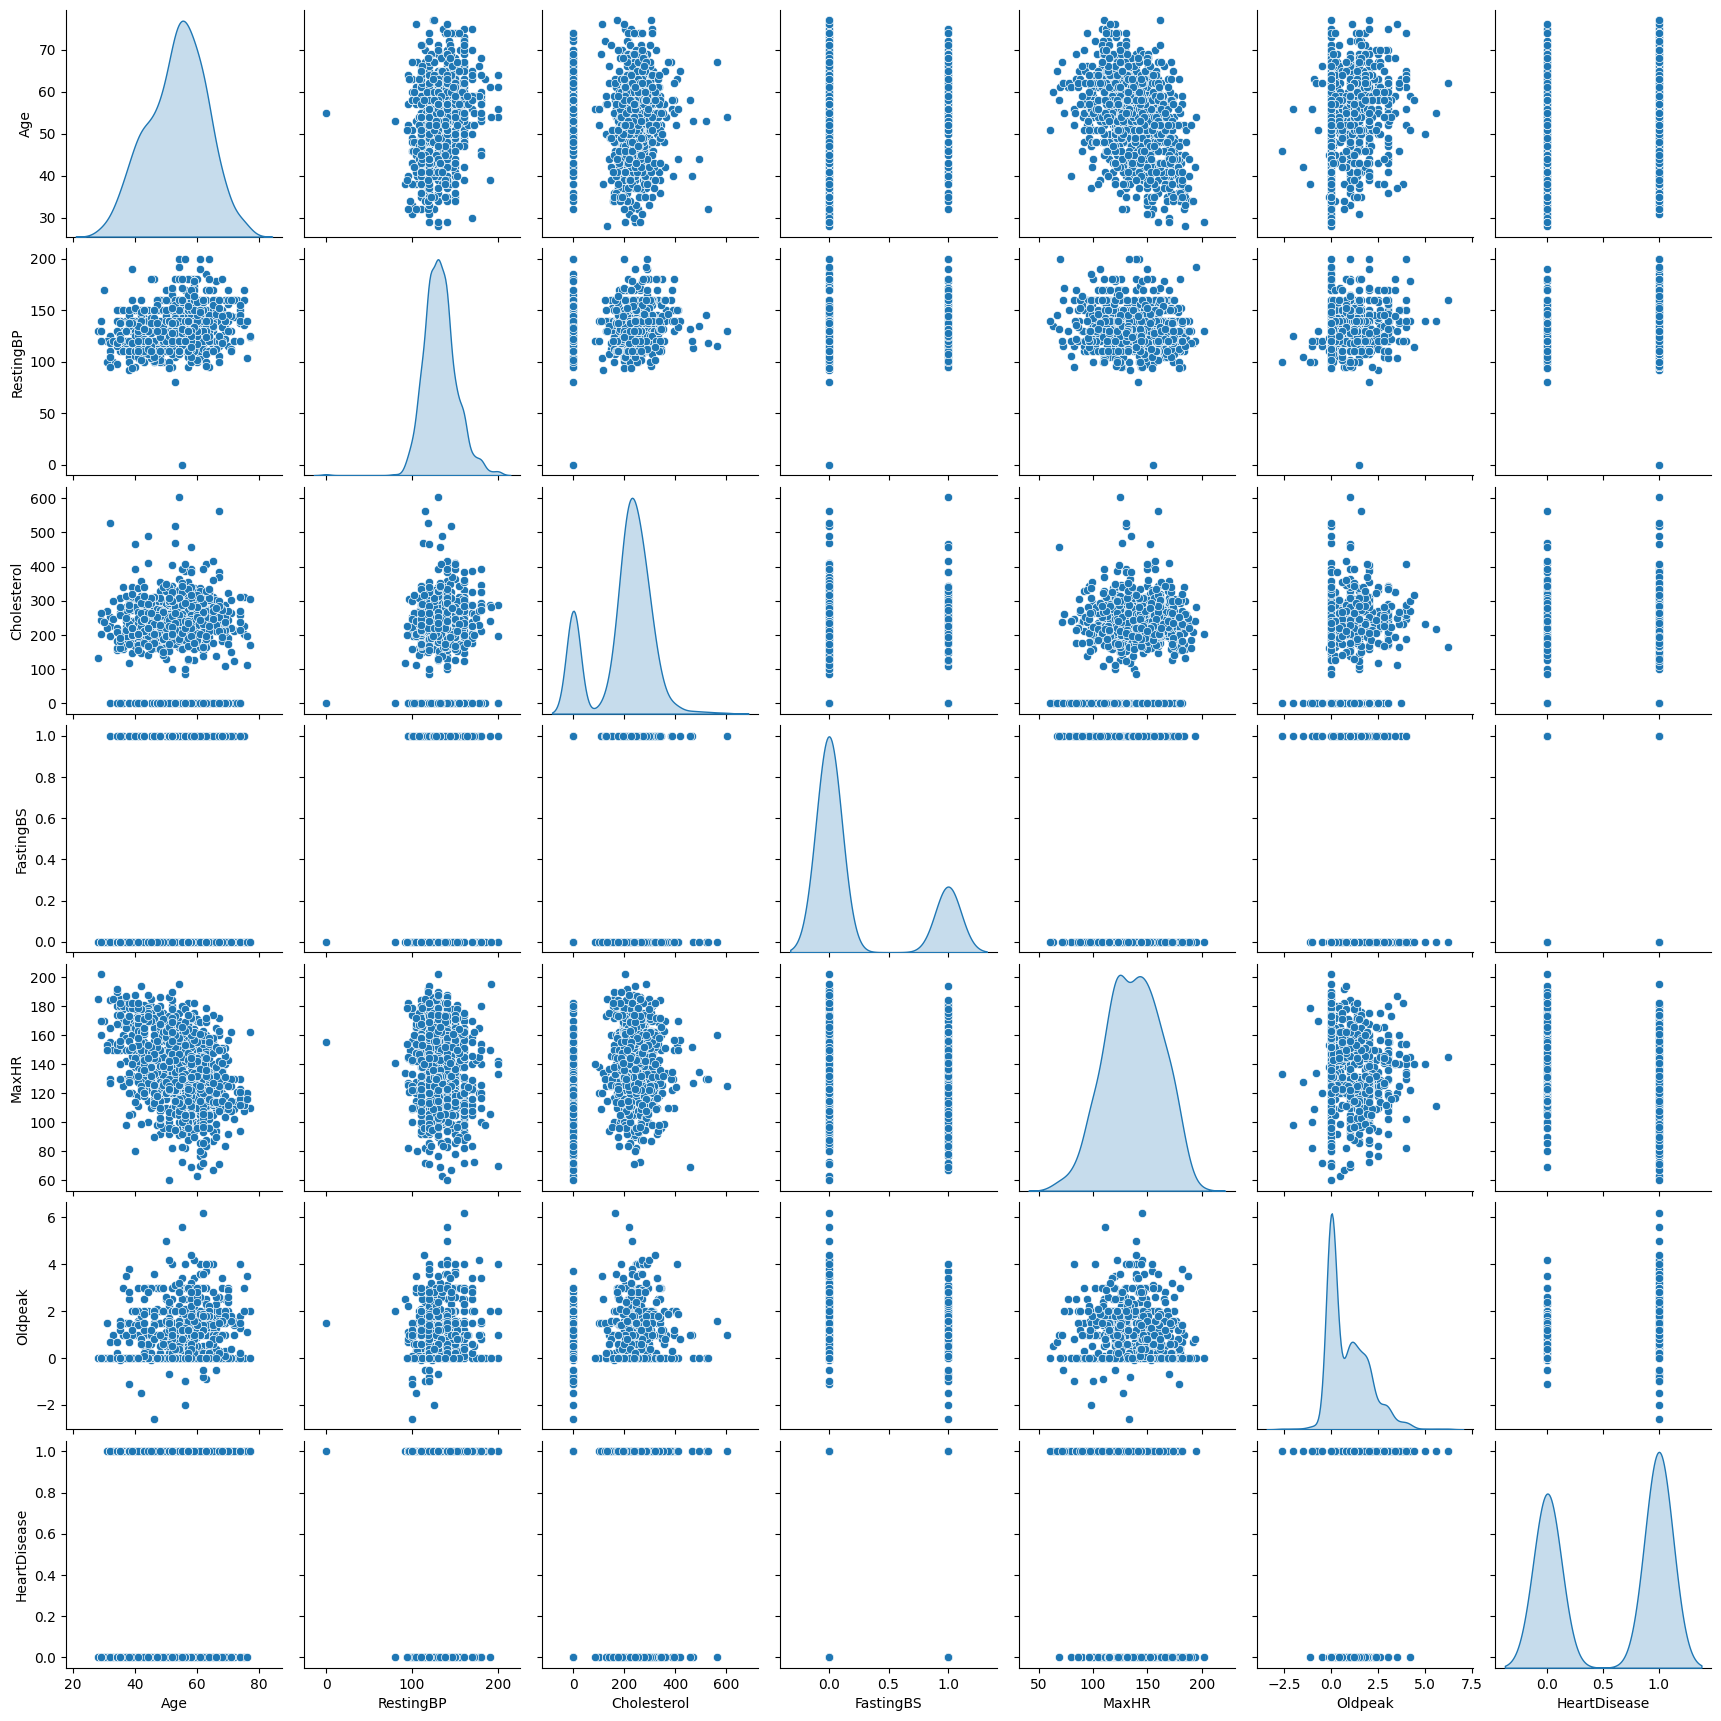

In [17]:
sns.pairplot(heart_disease.select_dtypes(['int64', 'float64']), diag_kind = 'kde')

Dibuat heatmap untuk melihat lebih jelas fitur numerical yang memiliki korelasi dengan _heart disease_

<ipython-input-18-62ab96dc4c9e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = heart_disease.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerical ')

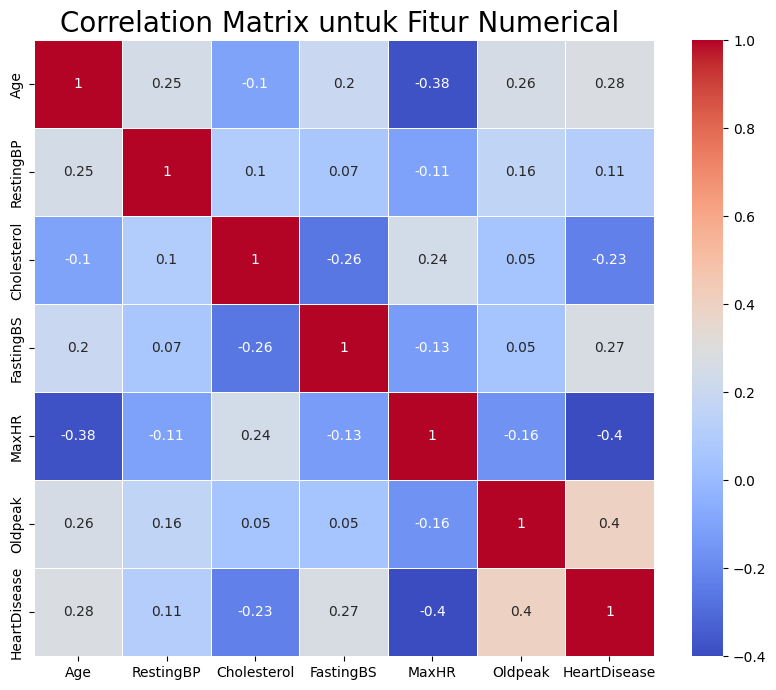

In [18]:
plt.figure(figsize=(10, 8))
correlation_matrix = heart_disease.corr().round(2)

sns.heatmap(data = correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerical ", size=20)

## Data Preparation
Pada bagian ini Anda menerapkan dan menyebutkan teknik data preparation yang dilakukan. Teknik yang digunakan pada notebook dan laporan harus berurutan.

_Data preparation_ yang digunakan di antaranya:

1. Seleksi data: menyeleksi data apakah data tersebut ada yang kosong atau tidak, jika ada data kosong maka akan dihapus.

`isnull().sum()` merupakan _command_ yang digunakan untuk mengecek apakah terdapat data yang kosong atau _missing data_ dan menjumlahkan banyak datanya. Namun, tidak terdapat data kosong atau _missing data_.

In [19]:
# checking null dataset and sum it, if any
heart_disease.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

2. Menangani Outlier: melakukan pengechekan apakah data _heart disease_ memiliki data outlier. Apabila terdapat data outlier, maka akan dihapus.

Untuk mengetahui data outlier yang dimiliki oleh dataset _heart disease_, maka digunakanlah `boxplot` yang memperlihatkan langsung keseluruhan dataset _heart disease_. Dapat dilihat bahwa terdapat beberapa outlier, khususnya pada fitur `Cholesterol` yang memiliki outlier paling banyak.

<ipython-input-20-5f7e1de54eb8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_disease['Age'],color='DeepPink')
<ipython-input-20-5f7e1de54eb8>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_disease['RestingBP'],color='DarkSlateGray')
<ipython-input-20-5f7e1de54eb8>:14: UserWarni

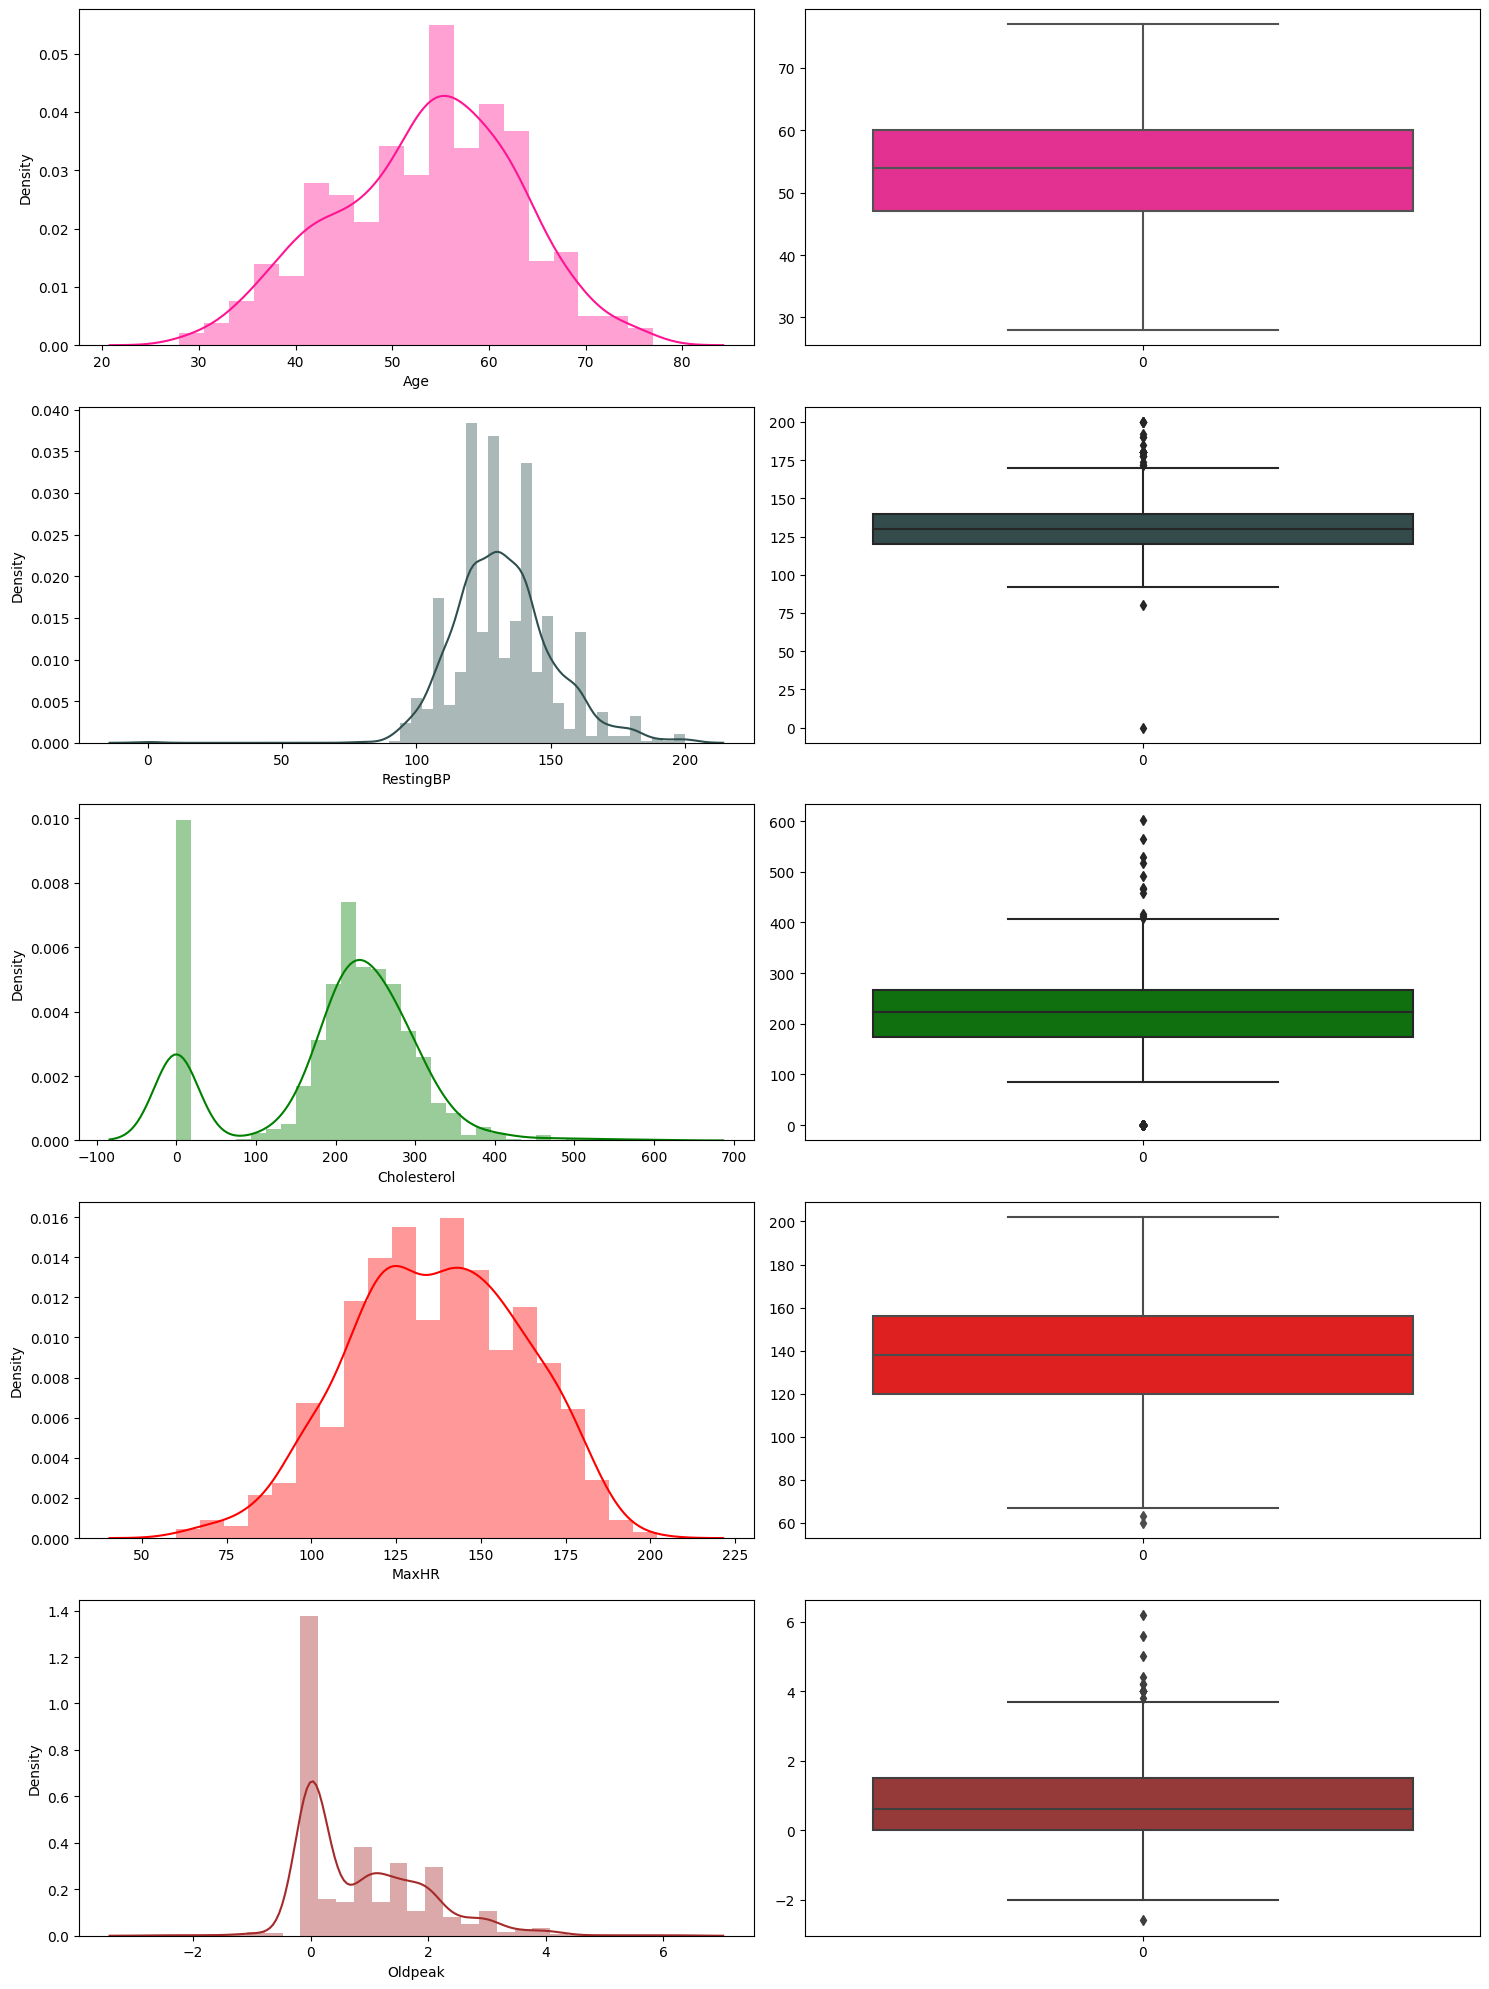

In [20]:
plt.figure(figsize=(15,20))

plt.subplot(5,2,1)
sns.distplot(heart_disease['Age'],color='DeepPink')
plt.subplot(5,2,2)
sns.boxplot(heart_disease['Age'],color='DeepPink')

plt.subplot(5,2,3)
sns.distplot(heart_disease['RestingBP'],color='DarkSlateGray')
plt.subplot(5,2,4)
sns.boxplot(heart_disease['RestingBP'],color='DarkSlateGray')

plt.subplot(5,2,5)
sns.distplot(heart_disease['Cholesterol'],color='Green')
plt.subplot(5,2,6)
sns.boxplot(heart_disease['Cholesterol'],color='Green')

plt.subplot(5,2,7)
sns.distplot(heart_disease['MaxHR'],color='Red')
plt.subplot(5,2,8)
sns.boxplot(heart_disease['MaxHR'],color='Red')

plt.subplot(5,2,9)
sns.distplot(heart_disease['Oldpeak'],color='Brown')
plt.subplot(5,2,10)
sns.boxplot(heart_disease['Oldpeak'],color='Brown')

plt.tight_layout()
plt.show()

<Axes: >

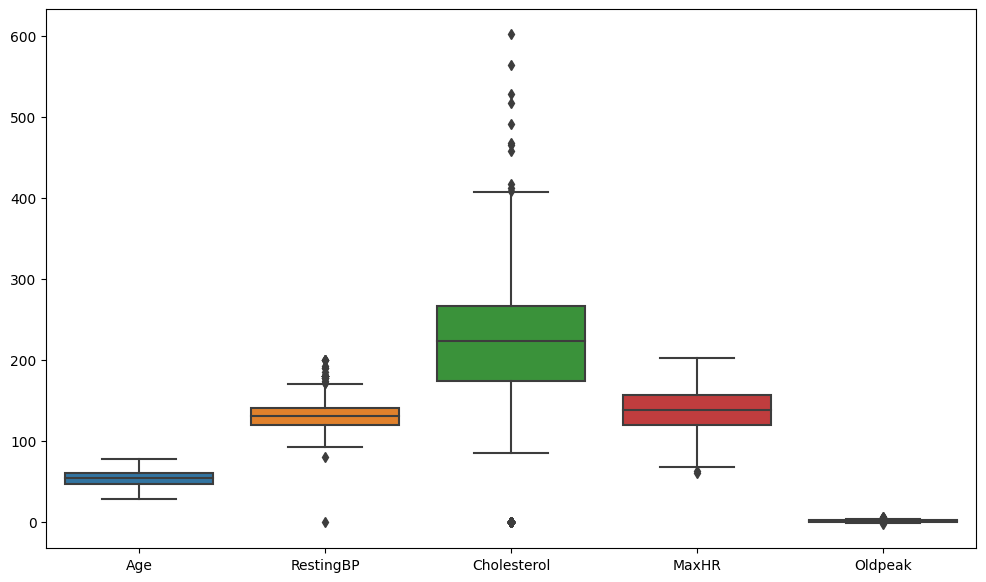

In [21]:
# Handling Outliers
plt.figure(figsize = (12, 7))
sns.boxplot(data = heart_disease[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

IQR bertujuan untuk mengapuskan outlier yang ada. Hasil akhir data dari outlier yang telah dihapuskan dapat dilihat dengan `shape`.

In [22]:
hd_outlier = heart_disease[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
# drop outliers
Q1 = hd_outlier.quantile(0.25)
Q3 = hd_outlier.quantile(0.75)

IQR = Q3 - Q1

outlier = hd_outlier[~((hd_outlier<(Q1-1.5*IQR))|(hd_outlier>(Q3+1.5*IQR))).any(axis=1)]

Setelah menangani outlier dengan IQR, maka didapatkan `shape` sebagai berikut:

In [23]:
outlier.shape

(702, 5)

Karena ditemukannya `cholesterol` yang memiliki nilai 0, maka nilai tersebut akan diganti dengan median dari `cholesterol`

In [24]:
heart_disease.loc[ heart_disease['Cholesterol'] == 0, 'Cholesterol'] == np.nan
heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [25]:
heart_disease['Cholesterol'] = heart_disease['Cholesterol'].fillna(heart_disease['Cholesterol'].median())
heart_disease['Cholesterol']

0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64

Blood Pressure pada fitur `RestingBP` memiliki 5 range, yakni Normal, Pre Hyper Tension, High Blood Pressude Stage 1, High Blood Pressuse Stage 2, dan Hyper Tensive. Maka, dibuatlah range-range baru terhadap Blood Pressure.

In [26]:
heart_disease = heart_disease.drop(heart_disease[(heart_disease['RestingBP'] == 0)].index)
normal_RestingBP = heart_disease[heart_disease['RestingBP'] <= 120 ]
PreHyper_RestingBP = heart_disease[(heart_disease['RestingBP'] > 120) & (heart_disease['RestingBP']<= 139) ]
High1_RestingBP = heart_disease[(heart_disease['RestingBP'] >= 140) & (heart_disease['RestingBP']<= 159) ]
High2_RestingBP = heart_disease[(heart_disease['RestingBP'] >= 160) & (heart_disease['RestingBP']<= 180) ]
HyperTensive_RestingBP = heart_disease[heart_disease['RestingBP'] >= 180]

(-1.25, 1.25, -1.25, 1.25)

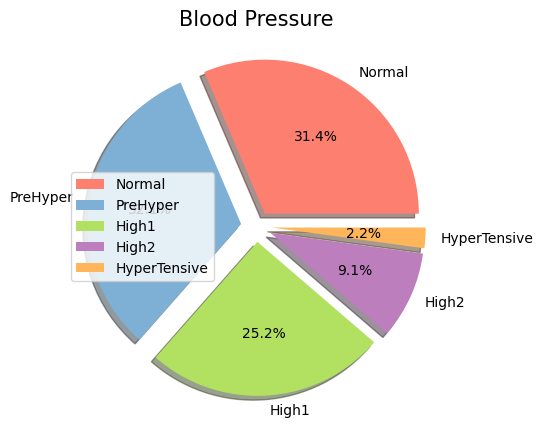

In [27]:
bp_label = ['Normal', 'PreHyper', 'High1', 'High2', 'HyperTensive']
bp_size = [292, 298, 234, 85, 20]
bp_color = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a"]

# checking plot of ST bp
plt.figure(figsize = (12, 5))
plt.pie(x = bp_size, explode = [0.1, 0.1, 0.1, 0.1, 0.1], labels = bp_label, colors = bp_color, autopct = '%1.1f%%', shadow = True)
plt.title('Blood Pressure', fontsize = 15)
plt.legend()
plt.axis('off')

3. Melakukan Label Encoder: Melakukan proses encoding terhadap `categorical_feature`

LabelEncoder() dilakukan terhadap fitur-fitur categorical

In [28]:
from sklearn.preprocessing import LabelEncoder

ChestPainType_label = LabelEncoder()
RestingECG_label = LabelEncoder()
ExerciseAngine_label = LabelEncoder()
ST_Slope_label = LabelEncoder()
Sex_label = LabelEncoder()

heart_disease['ChestPainType'] = ChestPainType_label.fit_transform(heart_disease['ChestPainType'])
heart_disease['RestingECG'] = RestingECG_label.fit_transform(heart_disease['RestingECG'])
heart_disease['ExerciseAngina'] = ExerciseAngine_label.fit_transform(heart_disease['ExerciseAngina'])
heart_disease['ST_Slope'] = ST_Slope_label.fit_transform(heart_disease['ST_Slope'])
heart_disease['Sex'] = Sex_label.fit_transform(heart_disease['Sex'])

In [29]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    int64  
 2   ChestPainType   917 non-null    int64  
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    int64  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    int64  
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    int64  
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    int64  
 11  HeartDisease    917 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.1 KB


<Axes: >

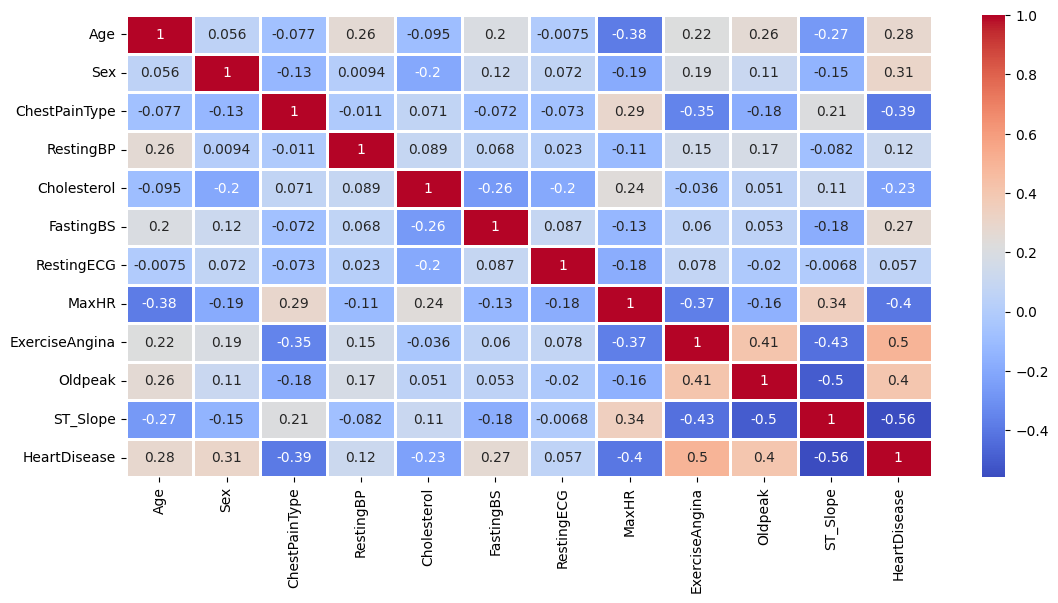

In [30]:
#Correlation between all features
fig , ax = plt.subplots(figsize=(13,6))
sns.heatmap(heart_disease.corr(), cmap="coolwarm", linecolor='white' , annot=True , linewidths=1 , ax=ax )

4. Membagi Data menjadi Training dan Testing

In [31]:
X = heart_disease.drop('HeartDisease', axis = 1)
Y = heart_disease.HeartDisease

In [32]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 21)

print('Shape dari Xtrain', Xtrain.shape)
print('Shape dari Xest', Xtest.shape)

Shape dari Xtrain (733, 11)
Shape dari Xest (184, 11)


5. Standarisasi

In [33]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X)

Xtrain = std_scaler.transform(Xtrain)
Xtest = std_scaler.transform(Xtest)

Xtrain = pd.DataFrame(Xtrain, columns=X.columns)
Xtest = pd.DataFrame(Xtest, columns=X.columns)

In [34]:
model = pd.DataFrame( index = ['train_mse', 'test_mse'],
                      columns = ['KNN', 'AdaBoost', 'RandomForest'])

## Modeling

Proses modeling yang dilakukan menggunakan 3 algoritma dan mencari performa yang paling baik di antara ketiganya.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtrain)
ytrue = ytrain

model.loc['train_mse', 'KNN'] = mean_squared_error(ypred, ytrue)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features = 7, max_depth = 3)
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtrain)
ytrue = ytrain

model.loc['train_mse', 'RandomForest'] = mean_squared_error(ypred, ytrue)

In [37]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 3, learning_rate = 0.2)
ada.fit(Xtrain, ytrain)
ypred = ada.predict(Xtrain)
ytrue = ytrain

model.loc['train_mse', 'AdaBoost'] = mean_squared_error(ypred, ytrue)

## Evaluasi Model

Evaluasi metrik yang digunakan untuk mengukur kinerja model adalah metrik mse (Mean Squared Error). Pemilihan matrik ini disebabkan karena kasus atau domain proyek yang dipilih adalah klasifikasi. Matrik MSE, pada dasarnya akan mengukur kuadrat rerata error dari prediksi yang dilakukan. MSE juga akan menghitung selisih kuadrat antara prediksi dan target, yang kemudian melakukan perhitungan rata-rata terhadap nilai-nilai tersebut.

Semakin tinggi nilai yang diperoleh MSE, semakin buruk juga modelnya. Nilai MSE tidak pernah negatif, tetapi akan menjadi NOL untuk model yang sempurna.

In [38]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'AdaBoost', 'RandomForest'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'AdaBoost': ada, 'RandomForest': rf}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=ytrain, y_pred=model.predict(Xtrain))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=ytest, y_pred=model.predict(Xtest))/1e3

# Panggil mse
mse

,train,test
KNN,0.000128,0.000141
AdaBoost,0.000183,0.000201
RandomForest,0.000116,0.000168


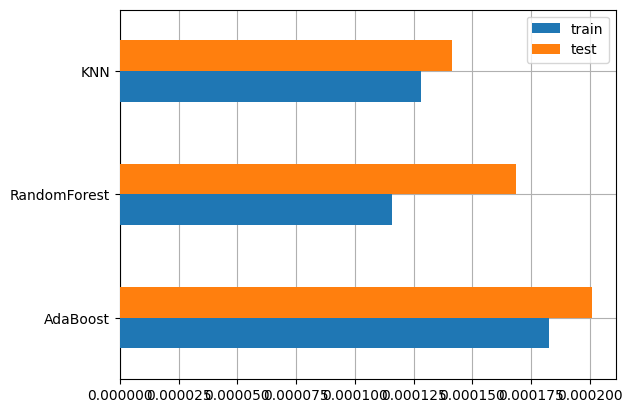

In [39]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari _plot_ yang disajikan di atas, dapat diketahui bahwa model KNN memberikan nilai error yang paling kecil. Sehingga, model KNN lah yang dipilih sebagai model terbaik untuk melakukan klasifikasi penyakit jantung.

In [40]:
prediksi = Xtest.iloc[:5].copy()
pred_dict = {'y_true':ytest[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_AdaBoost,prediksi_RandomForest
199,0,0,1,1
44,1,1,1,1
103,1,1,1,1
852,1,1,1,1
480,1,1,1,1


Hasil prediksi yang diberikan oleh model KNN adalah benar, dibandingkan dengan prediksi AdaBoost dan RandomForest.